In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
from code.preprocessing import get_dataset
from code.pca import customPCA
from code.optics import apply_optics

from code.metrics import get_metrics_general
from code.global_fastkmeans import run_global_kmeans


PCA_CLUSTER

In [69]:
def pca_cluster(data, Y, method='G-Means', max_clusters_gkmeans=12, optics_metric='euclidean', optics_algorithm='auto'):
    results = []
    ncol = data.shape[1]
    print(ncol)

    # Apply PCA
    pca = customPCA()
    reduced_data = pca.reduce_dim(data, n_components= (ncol+1))

    # Calculate explained variance
    explained_variance_ratio = pca.explained_variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, len(cumulative_explained_variance) + 1),
             cumulative_explained_variance * 100,
             marker='o', linestyle='-')
    plt.title('Cumulative Explained Variance by Principal Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.grid(True)
    plt.show()

    for component in np.arange(1, len(cumulative_explained_variance) + 1):

        reduced_data = pca.reduce_dim(data, n_components=component)


        if method == 'G-Means':
            start_time = time.time()
            #clusters_gkmeans, labels_gkmeans = run_global_kmeans(reduced_data, max_clusters=max_clusters_gkmeans, distance= 'euclidean')
            clusters_gkmeans, labels_gkmeans = run_global_kmeans(reduced_data, max_clusters=max_clusters_gkmeans, distance= 'euclidean')
            end_time = time.time()
            g_time = end_time - start_time
            reconstructed_data = pca.reconstruct(reduced_data)

            # Calculate reconstruction error
            reconstruction_error = pca.reconstruction_error(data)

            results_means = get_metrics_general(reduced_data, Y, labels_gkmeans, method, g_time, n_iterations=None)
            results_means['n_components'] = component
            results_means['explained_variance'] = cumulative_explained_variance[component - 1]
            results_means['reconstruction_error'] = reconstruction_error
            results.append(results_means)
            print(component)


        elif method == 'Optics':
            start_time = time.time()
            optics_labels = apply_optics(reduced_data, metric=optics_metric, algorithm=optics_algorithm)
            end_time = time.time()
            o_time = end_time - start_time
            reconstructed_data = pca.reconstruct(reduced_data)

            # Calculate reconstruction error
            reconstruction_error = pca.reconstruction_error(data)

            results_optics = get_metrics_general(reduced_data, Y, optics_labels, method, o_time, n_iterations=None)
            results_optics['n_components'] = component
            results_optics['explained_variance'] = cumulative_explained_variance[component - 1]
            results_optics['reconstruction_error'] = reconstruction_error
            results.append(results_optics)

    results_df = pd.DataFrame(results)

    columns = ['n_components'] + ['explained_variance'] + ['reconstruction_error'] + [col for col in results_df.columns if col not in ['n_components', 'explained_variance', 'reconstruction_error']]
    results_df = results_df[columns]


    return results_df


In [70]:
dataset = "vowel"
x, y = get_dataset(dataset)
vowel_x = x.copy()
vowel_y = y.copy()


26


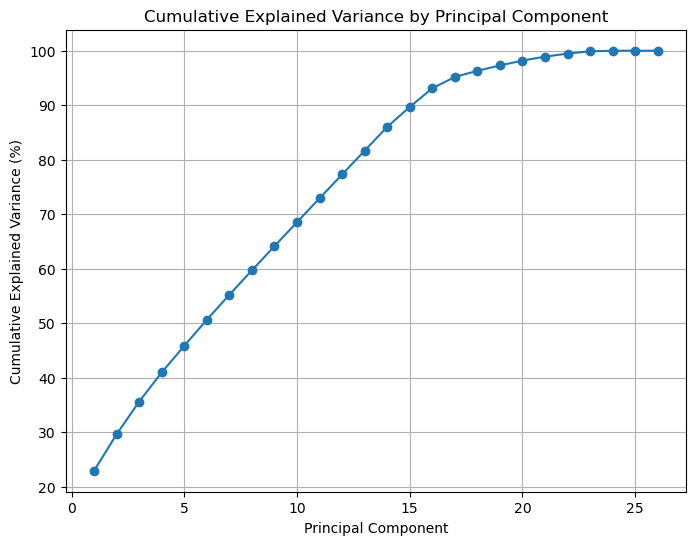

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.229406,3.412402e+01,G-Means,0.037819,0.220202,0.223191,0.519308,0.544592,148477.930907,7.430489,NaN
1,2,0.296372,3.260762e+01,G-Means,0.038007,0.214141,0.211586,0.708760,0.445101,5992.287854,7.710637,NaN
2,3,0.356272,3.118880e+01,G-Means,0.037283,0.195960,0.203720,0.801508,0.394973,1374.897709,7.831018,NaN
3,4,0.409737,2.986554e+01,G-Means,0.036658,0.175758,0.209604,0.908920,0.380988,796.998223,6.506175,NaN
4,5,0.458559,2.860374e+01,G-Means,0.028916,0.165657,0.176512,0.973197,0.384530,635.587551,7.502807,NaN
5,6,0.506322,2.731300e+01,G-Means,0.002007,0.126263,0.144424,0.895760,0.432790,544.965350,7.327662,NaN
6,7,0.552226,2.601218e+01,G-Means,-0.008268,0.103030,0.116239,0.861079,0.450326,496.095404,7.180226,NaN
7,8,0.597028,2.467656e+01,G-Means,-0.008597,0.096970,0.112281,0.824833,0.485652,517.801739,7.149188,NaN
8,9,0.641356,2.327978e+01,G-Means,-0.010065,0.090909,0.108108,0.729323,0.550033,534.009856,6.880363,NaN
9,10,0.685369,2.180462e+01,G-Means,-0.009546,0.090909,0.125000,0.779923,0.541405,455.077824,6.900651,NaN


In [71]:
results_vowel_means = pca_cluster(vowel_x, vowel_y, method='G-Means', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')
results_vowel_means.to_csv('./output/PCA_vowel_means.csv')
results_vowel_means

26


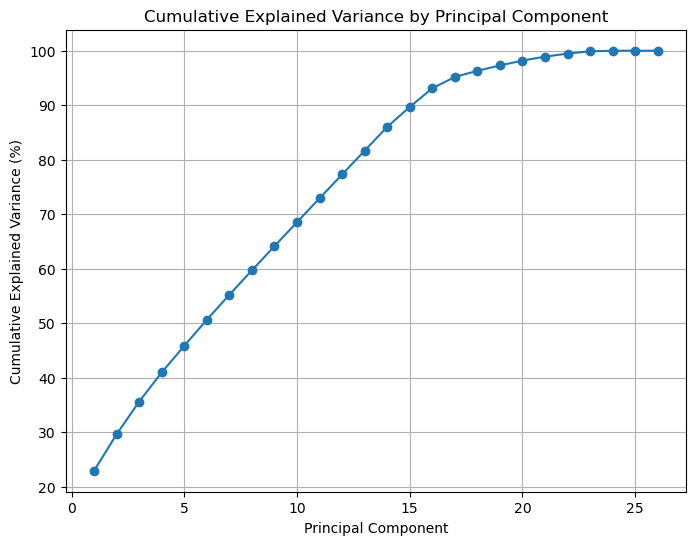

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.229406,3.412402e+01,Optics,0.004290,0.194949,0.276740,1.006805,-0.091427,48.024830,0.459770,NaN
1,2,0.296372,3.260762e+01,Optics,0.004911,0.164646,0.266953,1.048141,-0.384892,42.378329,0.387829,NaN
2,3,0.356272,3.118880e+01,Optics,0.012555,0.179798,0.282104,1.137274,-0.277270,36.869909,0.330071,NaN
3,4,0.409737,2.986554e+01,Optics,0.018272,0.179798,0.282478,1.177287,-0.220503,38.132787,0.361186,NaN
4,5,0.458559,2.860374e+01,Optics,0.047351,0.200000,0.287179,1.233138,-0.061699,44.946883,0.346339,NaN
5,6,0.506322,2.731300e+01,Optics,0.031674,0.174747,0.242292,1.180687,0.098656,78.545398,0.345048,NaN
6,7,0.552226,2.601218e+01,Optics,0.031885,0.174747,0.240749,1.143256,0.115582,80.018682,0.346457,NaN
7,8,0.597028,2.467656e+01,Optics,0.028294,0.162626,0.214308,1.213496,0.181407,94.029920,0.345514,NaN
8,9,0.641356,2.327978e+01,Optics,0.039282,0.174747,0.239961,1.209751,0.125203,76.532560,0.345246,NaN
9,10,0.685369,2.180462e+01,Optics,0.044144,0.186869,0.245698,1.195229,0.139904,78.255716,0.361588,NaN


In [72]:
results_vowel_optics = pca_cluster(vowel_x, vowel_y, method='Optics', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')
results_vowel_optics.to_csv('./output/PCA_vowel_optics.csv')
results_vowel_optics


In [79]:
dataset = "sick"
x, y = get_dataset(dataset)
sick_x = x.copy()
sick_y = y.copy()


33


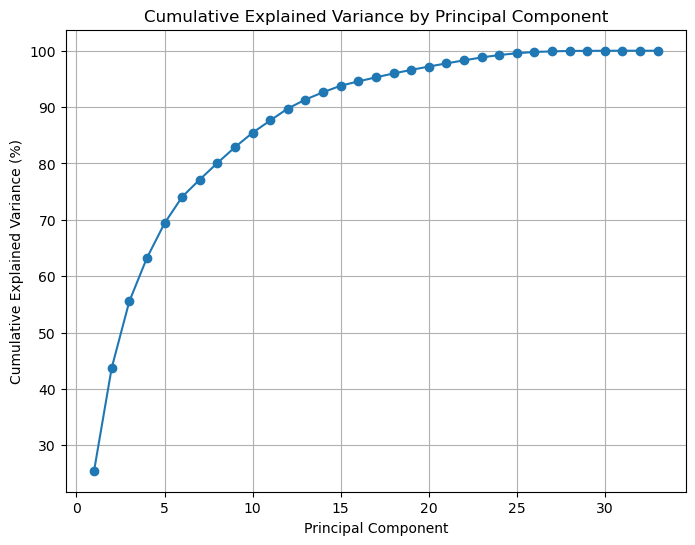

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.254858,7.577948e+01,G-Means,-0.001064,0.961008,0.335083,0.356669,0.731351,98988.220181,70.886408,NaN
1,2,0.437292,6.585272e+01,G-Means,0.001536,0.961008,0.401941,0.402472,0.797582,32990.889971,158.713724,NaN
2,3,0.555280,5.854306e+01,G-Means,0.000615,0.961008,0.396947,0.517045,0.752829,9316.031648,133.559057,NaN
3,4,0.632422,5.322388e+01,G-Means,0.001143,0.961008,0.396947,0.531431,0.704200,6383.921686,163.158607,NaN
4,5,0.693854,4.857316e+01,G-Means,0.000981,0.961008,0.407561,0.555643,0.718023,4523.236528,101.200771,NaN
5,6,0.740736,4.469956e+01,G-Means,-0.001243,0.961008,0.347284,0.618165,0.712989,3132.678431,103.246459,NaN
6,7,0.771486,4.196510e+01,G-Means,-0.001062,0.961008,0.347284,0.703207,0.616586,2183.840259,67.599576,NaN
7,8,0.800763,3.918471e+01,G-Means,-0.001547,0.961008,0.310103,0.772246,0.586766,1765.268156,73.862637,NaN
8,9,0.828918,3.631068e+01,G-Means,-0.001634,0.961008,0.310103,0.826400,0.581354,1527.724544,156.876713,NaN
9,10,0.854483,3.348796e+01,G-Means,-0.001635,0.961008,0.310103,0.824229,0.551514,1332.329441,170.779537,NaN


In [80]:
results_sick_means = pca_cluster(sick_x, sick_y, method='G-Means', max_clusters_gkmeans=12, optics_metric='manhattan', optics_algorithm='kd_tree')
results_sick_means.to_csv('./output/PCA_sick_means.csv')
results_sick_means

33


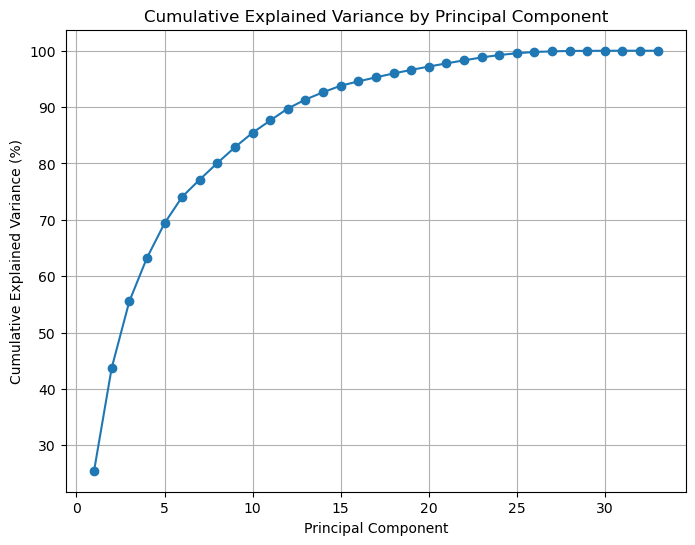

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.254858,7.577948e+01,Optics,-0.001706,0.961008,0.670045,5.890858,-0.141908,45.188937,2.399871,NaN
1,2,0.437292,6.585272e+01,Optics,-0.005405,0.961008,0.740767,1.033099,-0.281752,77.644899,2.261627,NaN
2,3,0.555280,5.854306e+01,Optics,-0.017051,0.961008,0.775578,1.083997,-0.343541,65.870019,2.323120,NaN
3,4,0.632422,5.322388e+01,Optics,-0.006077,0.961008,0.638428,1.024575,-0.087549,106.451816,2.558511,NaN
4,5,0.693854,4.857316e+01,Optics,0.003715,0.961008,0.699498,1.072138,-0.180097,75.384031,2.597097,NaN
5,6,0.740736,4.469956e+01,Optics,-0.001661,0.961008,0.740767,1.069205,-0.257088,62.255238,2.470066,NaN
6,7,0.771486,4.196510e+01,Optics,-0.000815,0.961008,0.639374,1.037606,-0.051352,99.300478,2.589909,NaN
7,8,0.800763,3.918471e+01,Optics,-0.002252,0.961008,0.757946,1.015075,-0.278201,61.723542,2.485046,NaN
8,9,0.828918,3.631068e+01,Optics,0.001043,0.961008,0.628413,1.048691,0.024653,102.941160,2.464170,NaN
9,10,0.854483,3.348796e+01,Optics,-0.001270,0.961008,0.592603,0.974034,0.094345,130.930782,2.512140,NaN


In [81]:
results_sick_optics = pca_cluster(sick_x, sick_y, method='Optics', max_clusters_gkmeans=12,  optics_metric='manhattan', optics_algorithm='kd_tree')
results_sick_optics.to_csv('./output/PCA_sick_optics.csv')
results_sick_optics

KERNEL PCA

In [75]:
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

def kernel_cluster(data, Y, method='G-Means', max_clusters_gkmeans=12, optics_metric='euclidean', optics_algorithm='auto'):
    results = []
    ncol = data.shape[1]
    # Initialize KernelPCA
    kpca = KernelPCA(kernel='rbf', n_components=(ncol), fit_inverse_transform=True)
    reduced_data = kpca.fit_transform(data)

    # Calculate explained variance
    eigenvalues = kpca.eigenvalues_
    total_variance = np.sum(eigenvalues)
    explained_variance_ratios = eigenvalues / total_variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratios)

    # Plot cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(
        np.arange(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance * 100,  # Percentage
        marker='o', linestyle='-'
    )
    plt.title('Cumulative Explained Variance by Principal Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.grid(True)
    plt.show()

    for component in range(1, len(cumulative_explained_variance) + 1):
        # Reduce data to the current number of components
        kpca = KernelPCA(kernel='rbf', n_components=component)
        reduced_data = kpca.fit_transform(data)

        if method == 'G-Means':
            start_time = time.time()
            clusters_gkmeans, labels_gkmeans = run_global_kmeans(
                reduced_data, max_clusters=max_clusters_gkmeans, distance='euclidean'
            )
            end_time = time.time()
            g_time = end_time - start_time

            # reconstruction_error
            reconstruction_error = np.nan

            results_means = get_metrics_general(reduced_data, Y, labels_gkmeans, method, g_time, n_iterations=None)
            results_means['n_components'] = component
            results_means['explained_variance'] = cumulative_explained_variance[component - 1]
            results_means['reconstruction_error'] = reconstruction_error
            results.append(results_means)
            print(component)

        elif method == 'Optics':
            start_time = time.time()
            optics_labels = apply_optics(reduced_data, metric=optics_metric, algorithm=optics_algorithm)
            end_time = time.time()
            o_time = end_time - start_time

            # reconstruction_error
            reconstruction_error = np.nan

            results_optics = get_metrics_general(reduced_data, Y, optics_labels, method, o_time, n_iterations=None)
            results_optics['n_components'] = component
            results_optics['explained_variance'] = cumulative_explained_variance[component - 1]
            results_optics['reconstruction_error'] = reconstruction_error
            results.append(results_optics)

    # Create a DataFrame with results
    results_df = pd.DataFrame(results)
    columns = ['n_components', 'explained_variance', 'reconstruction_error'] + [col for col in results_df.columns if col not in ['n_components', 'explained_variance', 'reconstruction_error']]
    results_df = results_df[columns]

    return results_df


In [76]:
dataset = "vowel"
x, y = get_dataset(dataset)
vowel_x = x.copy()
vowel_y = y.copy()

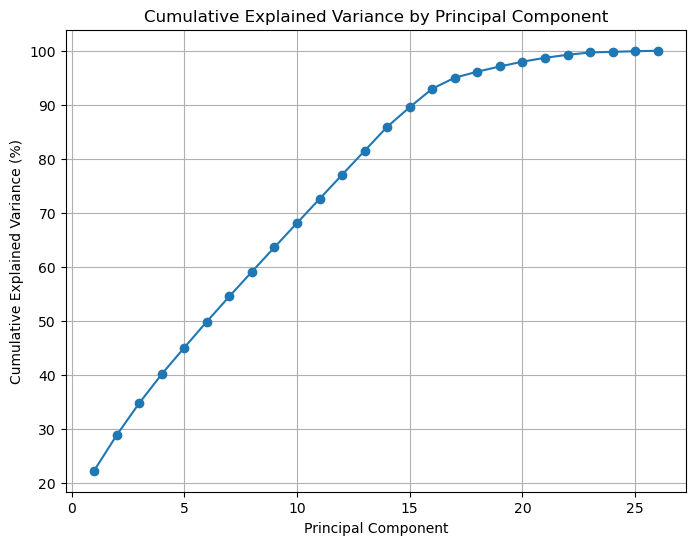

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.221905,NaN,G-Means,0.035797,0.222222,0.224224,0.519146,0.544564,159655.350422,7.790787,NaN
1,2,0.287668,NaN,G-Means,0.036534,0.208081,0.207066,0.699205,0.451275,6274.773976,7.113449,NaN
2,3,0.346958,NaN,G-Means,0.035328,0.191919,0.201058,0.793602,0.398962,1441.714612,7.411636,NaN
3,4,0.400726,NaN,G-Means,0.023171,0.167677,0.183253,0.926549,0.380322,861.795927,7.437939,NaN
4,5,0.449948,NaN,G-Means,0.024405,0.154545,0.170408,0.939023,0.403846,707.388489,7.545787,NaN
5,6,0.498190,NaN,G-Means,-0.000454,0.115152,0.133064,0.841844,0.467294,631.579655,7.365411,NaN
6,7,0.544836,NaN,G-Means,-0.007754,0.096970,0.112281,0.758316,0.510336,567.806280,7.171981,NaN
7,8,0.590583,NaN,G-Means,-0.010042,0.091919,0.108819,0.769443,0.510871,572.898327,7.041627,NaN
8,9,0.635824,NaN,G-Means,-0.010065,0.090909,0.108108,0.694070,0.576644,591.482026,6.607046,NaN
9,10,0.680714,NaN,G-Means,-0.010065,0.090909,0.108108,0.697678,0.593640,574.434370,6.201416,NaN


In [77]:
results_vowel_means = kernel_cluster(vowel_x, vowel_y, method='G-Means', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')
results_vowel_means.to_csv('./output/KERNEL_vowel_means.csv')
results_vowel_means

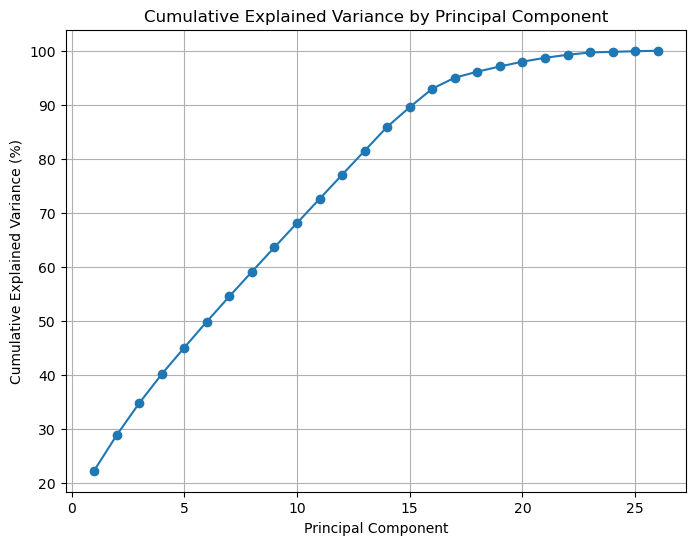

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.221905,NaN,Optics,0.009056,0.215152,0.280541,0.963127,0.021045,76.220453,0.242317,NaN
1,2,0.287668,NaN,Optics,0.005123,0.152525,0.251983,1.006397,-0.378884,51.402281,0.259036,NaN
2,3,0.346958,NaN,Optics,0.008619,0.175758,0.281050,1.082265,-0.305138,37.015471,0.246141,NaN
3,4,0.400726,NaN,Optics,0.012155,0.181818,0.281920,1.164419,-0.193256,42.542442,0.235647,NaN
4,5,0.449948,NaN,Optics,0.044032,0.200000,0.290456,1.225413,-0.078016,43.812426,0.237635,NaN
5,6,0.498190,NaN,Optics,0.029749,0.174747,0.243420,1.173341,0.097442,75.934643,0.235573,NaN
6,7,0.544836,NaN,Optics,0.042860,0.180808,0.256876,1.117396,0.071941,71.160797,0.253469,NaN
7,8,0.590583,NaN,Optics,0.049275,0.181818,0.245487,1.171073,0.118163,78.192233,0.235847,NaN
8,9,0.635824,NaN,Optics,0.039807,0.174747,0.239961,1.193142,0.116636,75.480188,0.246342,NaN
9,10,0.680714,NaN,Optics,0.041965,0.174747,0.235199,1.190429,0.159869,84.226584,0.251046,NaN


In [78]:
results_vowel_optics = kernel_cluster(vowel_x, vowel_y, method='Optics', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')
results_vowel_optics.to_csv('./output/KERNEL_vowel_optics.csv')
results_vowel_optics

In [82]:
dataset = "sick"
x, y = get_dataset(dataset)
sick_x = x.copy()
sick_y = y.copy()

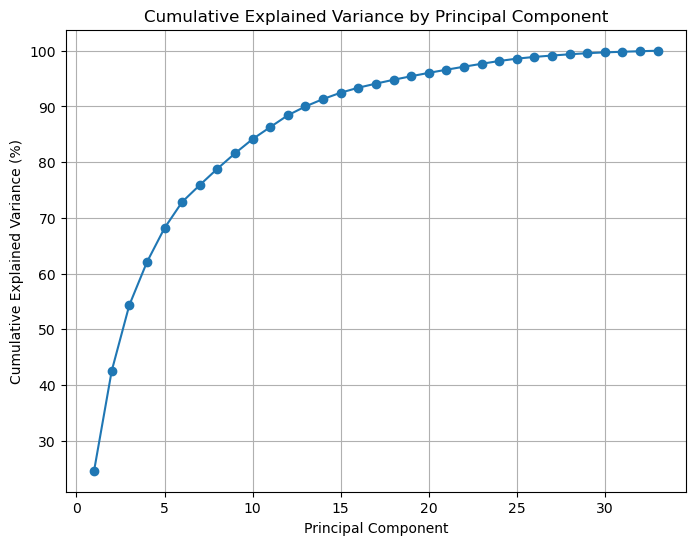

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.246260,NaN,G-Means,-0.000843,0.961008,0.350483,0.308923,0.760328,122308.368191,73.039120,NaN
1,2,0.425328,NaN,G-Means,0.001496,0.961008,0.400945,0.414310,0.795977,34618.462233,70.296457,NaN
2,3,0.543383,NaN,G-Means,0.000459,0.961008,0.396947,0.491150,0.763816,10915.647433,65.901208,NaN
3,4,0.620592,NaN,G-Means,0.000876,0.961008,0.396947,0.524706,0.710993,7134.617349,66.628348,NaN
4,5,0.681781,NaN,G-Means,0.001327,0.961008,0.407232,0.583233,0.711004,4931.879251,121.878847,NaN
5,6,0.728624,NaN,G-Means,-0.001158,0.961008,0.346928,0.609668,0.719423,3361.461229,173.527231,NaN
6,7,0.758915,NaN,G-Means,-0.001152,0.961008,0.347284,0.672786,0.647464,2356.905641,163.402208,NaN
7,8,0.788225,NaN,G-Means,-0.001465,0.961008,0.310103,0.772048,0.587521,1843.018660,141.676655,NaN
8,9,0.815818,NaN,G-Means,-0.001659,0.961008,0.309356,0.810276,0.583498,1594.769303,137.717179,NaN
9,10,0.841415,NaN,G-Means,-0.001928,0.961008,0.309730,0.846036,0.559822,1402.991532,127.747528,NaN


In [83]:
results_sick_means = kernel_cluster(sick_x, sick_y, method='G-Means', max_clusters_gkmeans=12,  optics_metric='manhattan', optics_algorithm='kd_tree')
results_sick_means.to_csv('./output/KERNEL_sick_means.csv')
results_sick_means

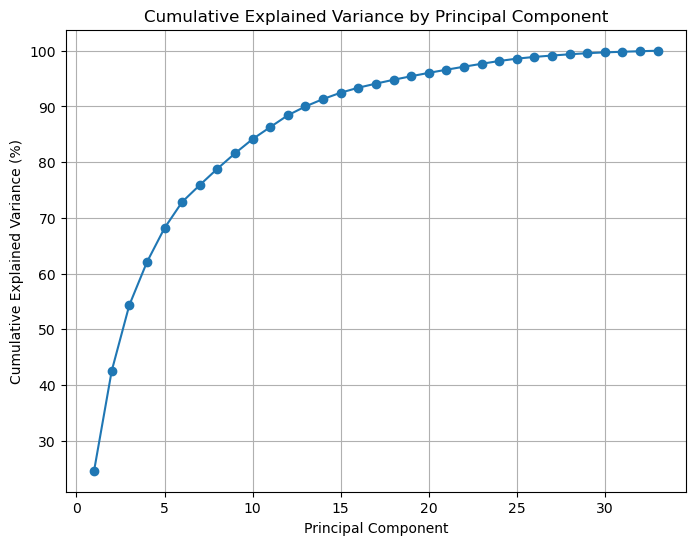

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.246260,NaN,Optics,0.000271,0.961008,0.570674,3.890004,0.025518,65.802737,2.398502,NaN
1,2,0.425328,NaN,Optics,-0.008086,0.961008,0.714130,1.050161,-0.238946,77.887248,2.573190,NaN
2,3,0.543383,NaN,Optics,-0.016712,0.961008,0.727392,1.117587,-0.238564,74.349091,2.635802,NaN
3,4,0.620592,NaN,Optics,-0.004475,0.961008,0.716847,1.005086,-0.226912,78.676224,2.605091,NaN
4,5,0.681781,NaN,Optics,0.001535,0.961008,0.732900,1.046191,-0.250510,69.724477,2.745391,NaN
5,6,0.728624,NaN,Optics,0.000763,0.961008,0.708023,1.069812,-0.170933,85.455749,2.745573,NaN
6,7,0.758915,NaN,Optics,-0.004315,0.961008,0.699283,1.044741,-0.162251,78.701497,2.824186,NaN
7,8,0.788225,NaN,Optics,0.000488,0.961008,0.554754,1.023043,0.144168,149.752441,2.840197,NaN
8,9,0.815818,NaN,Optics,0.000541,0.961008,0.650383,1.058211,-0.042282,83.833818,2.902617,NaN
9,10,0.841415,NaN,Optics,-0.008428,0.961008,0.731273,1.025123,-0.215418,61.576024,2.839663,NaN


In [84]:
results_sick_optics = kernel_cluster(sick_x, sick_y, method='Optics', max_clusters_gkmeans=12,  optics_metric='manhattan', optics_algorithm='kd_tree')
results_sick_optics.to_csv('./output/KERNEL_sick_optics.csv')
results_sick_optics